In [12]:
# Import Libraries
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pickle


In [13]:
# Load the Digits Dataset
digits = load_digits()


In [14]:
images = digits.images     # shape: (1797, 8, 8)
labels = digits.target     # shape: (1797,)


In [15]:
# Split Features and Labels
X = digits.images.reshape((1797, 64))  # Flatten 8x8 images → 64 features
X = X / 16.0                           # Normalize pixel values (0-1)
y = digits.target

In [16]:
# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9666666666666667

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


🧾 Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0 

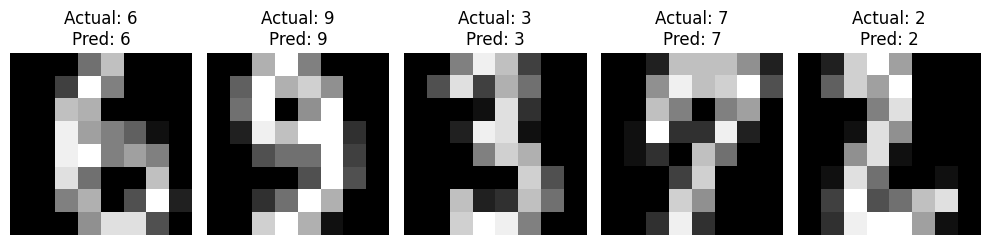

In [19]:
# Visualize Some Predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Actual: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

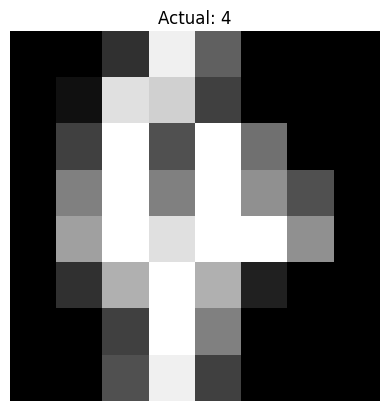

Model guess: 4


In [20]:
index = 12  # test image number

plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
plt.title(f"Actual: {y_test[index]}")
plt.axis('off')
plt.show()

# Predict
predicted_digit = model.predict([X_test[index]])
print("Model guess:", predicted_digit[0])


In [21]:
with open("mnist_model.pkl", "wb") as f:
    pickle.dump(model, f)


print("✅ Model saved as mnist_model.pkl")


✅ Model saved as mnist_model.pkl
